# Creating a confusion matrix for intents.

This sample code shows you how to query a conversation system, and then generate a confusion matrix. This example is self contained, and only requires the following: 

* **Service Details**: You can copy the `ctx` object from the service credentials. The example shown below will not work.
* **Version**: The best place to get this is the <A href="https://www.ibm.com/watson/developercloud/doc/conversation/release-notes.html">Release Notes</A>.
* **Language**: The 2 character identifier of the workspace language. 

**NOTE**: If you already have a workspace set up, and you want to just create the confusion matrix, jump straight to "Creating the confusion matrix.". 

In [44]:
ctx = {
  "url": "https://gateway.watsonplatform.net/conversation/api",
  "username": "39d4233-ffee-4084-a232-46cf3c375a212",
  "password": "B3d45sQwqTs"
}

version = '2017-05-26'
language = 'en'

## Conversation Initialisation. 

In [45]:
from watson_developer_cloud import ConversationV1

conversation = ConversationV1(
    url=ctx.get('url'),
    username=ctx.get('username'),
    password=ctx.get('password'),
    version=version,
)

## Set up the workspace to test. 
This section will create a sample workspace directly from the notebook.

### Intents
Creating this as a dataframe so that I can easily build the required intents object for conversation. Normally I would just read in the csv file with the following code (specify columns if none are mentioned in your file. 

    import pandas as pd
    intents = pd.read_csv('questions.csv', columns=['question','intent'])

In [70]:
import pandas as pd

qi = pd.DataFrame([
    { "question": "Are the puppies certified?", "intent": "DOG_CERTIFICATION" },
    { "question": "What cert does the puppy have?", "intent": "DOG_CERTIFICATION" },
    { "question": "Does the dog have a certificate?", "intent": "DOG_CERTIFICATION" },
    { "question": "Is the puppy certified by a vet?", "intent": "DOG_CERTIFICATION" },
    { "question": "Has the puppy been cleared by a vet?", "intent": "DOG_CERTIFICATION" },
    { "question": "Has a vet certified the dog?", "intent": "DOG_CERTIFICATION" },
    { "question": "What are the size of the parents?", "intent": "DOG_PARENTS_INFORMATION" },
    { "question": "What were the breeds of the parents?", "intent": "DOG_PARENTS_INFORMATION" },
    { "question": "Did the puppies parents have any issues?", "intent": "DOG_PARENTS_INFORMATION" },
    { "question": "Where there any problems with the puppies parents?", "intent": "DOG_PARENTS_INFORMATION" },
    { "question": "Can I have details about the sire?", "intent": "DOG_PARENTS_INFORMATION" },
    { "question": "What breed is the puppies mother?", "intent": "DOG_PARENTS_INFORMATION" },
    { "question": "Can I meet the parents?", "intent": "DOG_MEET_PARENTS" },
    { "question": "Can I visit the sire?", "intent": "DOG_MEET_PARENTS" },
    { "question": "Do you allow access to the puppies parents?", "intent": "DOG_MEET_PARENTS" },
    { "question": "I would like to see the mother", "intent": "DOG_MEET_PARENTS" },
    { "question": "Can I get access to the father?", "intent": "DOG_MEET_PARENTS" },
    { "question": "I would like to check the health of the mother and father", "intent": "DOG_MEET_PARENTS" },
    { "question": "How socialised are the puppies?", "intent": "DOG_SOCIALISATION" },
    { "question": "Has the puppy been around other dogs?", "intent": "DOG_SOCIALISATION" },
    { "question": "Is the dog friendly? ", "intent": "DOG_SOCIALISATION" },
    { "question": "Has the dog been around people? ", "intent": "DOG_SOCIALISATION" },
    { "question": "How does the dog handle strangers?", "intent": "DOG_SOCIALISATION" },
    { "question": "How friendly is the dog?", "intent": "DOG_SOCIALISATION" },
    { "question": "Was the dog well treated when being raised?", "intent": "DOG_SOCIALISATION" },
    { "question": "What vaccines has it had?", "intent": "DOG_VACCINATIONS" },
    { "question": "Has the puppy been vacinated? ", "intent": "DOG_VACCINATIONS" },
    { "question": "What shots has the dog gotten?", "intent": "DOG_VACCINATIONS" },
    { "question": "Do I need to get shots? ", "intent": "DOG_VACCINATIONS" },
    { "question": "Is the dogs injections covered?", "intent": "DOG_VACCINATIONS" },
    { "question": "When is the puppy due its shots?", "intent": "DOG_VACCINATIONS" },
    { "question": "How many vacines has the dog had?", "intent": "DOG_VACCINATIONS" },
    { "question": "Has the puppy been dewormed?", "intent": "DOG_DEWORMING" },
    { "question": "Do I need to worry about fleas?", "intent": "DOG_DEWORMING" },
    { "question": "Do I need to get the dog dewormed?", "intent": "DOG_DEWORMING" },
    { "question": "Do you check the dog for fleas or worms?", "intent": "DOG_DEWORMING" },
    { "question": "Can you guarantee the dog doesn't have worms?", "intent": "DOG_DEWORMING" },
    { "question": "Do you verify that the puppy does not have fleas?", "intent": "DOG_DEWORMING" },
    { "question": "Has the puppy been sick?", "intent": "DOG_HEALTH" },
    { "question": "Has the dog ever been sick?", "intent": "DOG_HEALTH" },
    { "question": "If the dog has been sick, what did it have?", "intent": "DOG_HEALTH" },
    { "question": "What happens if the dog was not well?", "intent": "DOG_HEALTH" },
    { "question": "Has the puppy ever been ill?", "intent": "DOG_HEALTH" },
    { "question": "Can you tell me if the puppy was not well?", "intent": "DOG_HEALTH" },
    { "question": "Has the dog ever been unhealthy?", "intent": "DOG_HEALTH" },
    { "question": "Has any of the litter been sick?", "intent": "LITTER_HEALTH" },
    { "question": "Has the litter had sickness?", "intent": "LITTER_HEALTH" },
    { "question": "Were any of the puppies peers ill?", "intent": "LITTER_HEALTH" },
    { "question": "Has the litter been not well?", "intent": "LITTER_HEALTH" },
    { "question": "Has the litter experienced any health problems?", "intent": "LITTER_HEALTH" },
    { "question": "Has there been any sickness in other puppies of the same group?", "intent": "LITTER_HEALTH" },
    { "question": "Did any of the litter need to see a vet?", "intent": "LITTER_HEALTH" },
    { "question": "What visits to the vets took place?", "intent": "DOG_VET_VISITS" },
    { "question": "Did the dog have to visit a vet?", "intent": "DOG_VET_VISITS" },
    { "question": "Has the puppy ever gone to a vet?", "intent": "DOG_VET_VISITS" },
    { "question": "Did you need to bring the dog ot a vet?", "intent": "DOG_VET_VISITS" },
    { "question": "has the puppy had to go see a vet?", "intent": "DOG_VET_VISITS" },
    { "question": "did a vet ever have to look at the pupppy?", "intent": "DOG_VET_VISITS" },
    { "question": "What is your guarantee?", "intent": "BREEDER_GUARANTEE" },
    { "question": "What guarantee do you offer?", "intent": "BREEDER_GUARANTEE" },
    { "question": "Do you have any kind of guarantee with the puppy?", "intent": "BREEDER_GUARANTEE" },
    { "question": "Can I get details as to your guarantee?", "intent": "BREEDER_GUARANTEE" },
    { "question": "Am I able to return the puppy?", "intent": "BREEDER_GUARANTEE" },
    { "question": "What if I don't like the puppy when I bring home? Can I give back?", "intent": "BREEDER_GUARANTEE" },
    { "question": "What references do you have?", "intent": "BREEDER_REFERENCES" },
    { "question": "Can you give me any references?", "intent": "BREEDER_REFERENCES" },
    { "question": "Can I talk to other customers?", "intent": "BREEDER_REFERENCES" },
    { "question": "Would it be possible to get other buyers details to check?", "intent": "BREEDER_REFERENCES" },
    { "question": "Do you have a list of other people who bought a puppy from you?", "intent": "BREEDER_REFERENCES" },
    { "question": "I'd like to talk to another owner, is that possible?", "intent": "BREEDER_REFERENCES" },
    { "question": "Do you have a breeder contract?", "intent": "BREEDER_CONTRACT" },
    { "question": "Do I need to sign a contract to buy a puppy?", "intent": "BREEDER_CONTRACT" },
    { "question": "Will you have a breeder contract?", "intent": "BREEDER_CONTRACT" },
    { "question": "Does buying the puppy require signing a contract?", "intent": "BREEDER_CONTRACT" },
    { "question": "If a contract is required, what is in it?", "intent": "BREEDER_CONTRACT" },
    { "question": "What is in your contract?", "intent": "BREEDER_CONTRACT" },
    { "question": "Do I need to spay/neuter the puppy? /limited registration", "intent": "DOG_LIMITED_REGISTRATION" },
    { "question": "Is your breeds under limited registration?", "intent": "DOG_LIMITED_REGISTRATION" },
    { "question": "Do I need to get the puppy spayed at a later time?", "intent": "DOG_LIMITED_REGISTRATION" },
    { "question": "Do I need to get the dog neutered?", "intent": "DOG_LIMITED_REGISTRATION" },
    { "question": "Is the dog under a limited registration? If so what are the details?", "intent": "DOG_LIMITED_REGISTRATION" },
    { "question": "How long am I allowed to use the dog to breed for?", "intent": "DOG_LIMITED_REGISTRATION" },
    { "question": "What are you aiming for in breeding?", "intent": "BREEDER_INFORMATION" },
    { "question": "Why do you breed these dogs?", "intent": "BREEDER_INFORMATION" },
    { "question": "Can you tell me more about why you breed these dogs?", "intent": "BREEDER_INFORMATION" },
    { "question": "Do you have details on your breeding business?", "intent": "BREEDER_INFORMATION" },
    { "question": "What is your mission statement?", "intent": "BREEDER_INFORMATION" },
    { "question": "Why breed these dogs?", "intent": "BREEDER_INFORMATION" },
    { "question": "What has the puppies been fed?", "intent": "DOG_FOOD" },
    { "question": "What does the dog like to eat?", "intent": "DOG_FOOD" },
    { "question": "What food do I need to get?", "intent": "DOG_FOOD" },
    { "question": "Is there a partiular food I need for the puppy?", "intent": "DOG_FOOD" },
    { "question": "What dog food brand do you use?", "intent": "DOG_FOOD" },
    { "question": "Do you have a food/mix ratio I need to be aware of?", "intent": "DOG_FOOD" },
    { "question": "Can my vet examine the puppies?", "intent": "ALLOW_VET" },
    { "question": "I would like to bring a vet along. Is that allowed?", "intent": "ALLOW_VET" },
    { "question": "Will you let my local vet look at the puppies?", "intent": "ALLOW_VET" },
    { "question": "I will buy the puppy if you let me veterianian see it first. ", "intent": "ALLOW_VET" },
    { "question": "Do you allow access from vets?", "intent": "ALLOW_VET" },
    { "question": "I will be bringing my vet along, is that ok?", "intent": "ALLOW_VET" },
    { "question": "I want to buy a puppy.", "intent": "PURCHASE_DOG" },
    { "question": "Can I buy a dog?", "intent": "PURCHASE_DOG" },
    { "question": "I am ready to buy your puppies", "intent": "PURCHASE_DOG" },
    { "question": "Please sell me your dog", "intent": "PURCHASE_DOG" },
    { "question": "I love the look of your dog, can I buy it.", "intent": "PURCHASE_DOG" }
], columns=['question','intent'])

print('Example')
qi.head(3)

Example


,question,intent
0,Are the puppies certified?,DOG_CERTIFICATION
1,What cert does the puppy have?,DOG_CERTIFICATION
2,Does the dog have a certificate?,DOG_CERTIFICATION


### Convert dataframe to intent object. 
We restructure the data above into an intent object. That object will look like: 

    {
      "intent": "DOG_CERTIFICATION",
      "examples": [
        { "text": "Are the puppies certified?" },
        ...
      ]
     }

In [47]:
grouped = qi.groupby('intent')

# intent, description, examples[]
intents = []
for name, group in grouped:
    examples = []
    for index, row in group.iterrows(): 
        example = { 'text': row['question'] }
        examples.append(example)
    
    intent = { 
        'intent': name,
        'examples': examples
    }
    
    intents.append(intent)

### Dialog Node
We only create one dialog node which captures everything, as we are only testing the intents. 

In [48]:
dialog_nodes = [
    {
     'dialog_node': 'Capture All',
     'description': 'Intercepting everything',
     'conditions': 'anything_else',
     'parent': None, 
     'previous_sibling': None,
     'output': {'text': {'values': ['<? input.text ?>'], 'selection_policy': 'sequential'}}, 
     'context': None,
     'metadata': None,
     'go_to': None
    }
]

## Build the workspace.
This piece of code will create a workspace in the service you specified, and return the workspace ID. 

In [49]:
response = conversation.create_workspace(
    dialog_nodes=dialog_nodes,
    intents=intents,
    language=language,
    name='Confusion Matrix Example'
)
print(response)

workspace_id = response['workspace_id']

{'name': 'Confusion Matrix Example', 'created': '2017-06-22T07:52:15.847Z', 'updated': '2017-06-22T07:52:15.847Z', 'language': 'en', 'metadata': None, 'description': None, 'workspace_id': '06b5b20a-8bc6-401b-bdce-e547f4eda315'}


---

# Before going on. Make sure it's ready. 
Once you have created the workspace, it can take a minute for it to complete training. So you can check the status, and ensure that it is set to "Available". 

In [52]:
response = conversation.get_workspace(workspace_id=workspace_id, export=False)

print(response)
print('\nStatus is: {}'.format(response['status']))


{'name': 'Confusion Matrix Example', 'created': '2017-06-22T07:52:15.847Z', 'updated': '2017-06-22T07:52:15.847Z', 'language': 'en', 'metadata': None, 'description': None, 'workspace_id': '06b5b20a-8bc6-401b-bdce-e547f4eda315', 'status': 'Available'}

Status is: Available


--- 

# Creating the confusion matrix. 
If you plan to run this against one of your existing workspaces. You can run from here providing you have set the following things from earlier. 

* `workspace_id`
* `conversation` object (first two pieces of code at the top of the document)

---
### Testing set. 
To create the confusion matrix, you need to test questions that the system hasn't seen before. So these are examples. Again you could load this from a CSV file.

In [211]:
test_questions = pd.DataFrame([
    { "question": "Will my dog have a certification?", "intent": "DOG_CERTIFICATION" },
    { "question": "Are your dogs certified?", "intent": "DOG_CERTIFICATION" },
    { "question": "What can you tell me about the puppies parents?", "intent": "DOG_PARENTS_INFORMATION" },
    { "question": "What can you tell me about it's mother?", "intent": "DOG_PARENTS_INFORMATION" },
    { "question": "I want to see the mother", "intent": "DOG_MEET_PARENTS" },
    { "question": "allowed visit sire", "intent": "DOG_MEET_PARENTS" },
    { "question": "Is the dog house trained?", "intent": "DOG_SOCIALISATION" },
    { "question": "Is the dog used to children?", "intent": "DOG_SOCIALISATION" },
    { "question": "Are it's shots all up to date?", "intent": "DOG_VACCINATIONS" },
    { "question": "Will my dog be fully vaccinated?", "intent": "DOG_VACCINATIONS" },
    { "question": "Do I need to get tablets for the puppy to get rid of worms?", "intent": "DOG_DEWORMING" },
    { "question": "The dog will be worm free, right?", "intent": "DOG_DEWORMING" },
    { "question": "was the sire ever sick", "intent": "DOG_HEALTH" },
    { "question": "Has the puppy ever been unwell?", "intent": "DOG_HEALTH" },
    { "question": "Has any of the litter been unwell before?", "intent": "LITTER_HEALTH" },
    { "question": "How was the health of the pack?", "intent": "LITTER_HEALTH" },
    { "question": "Has the dog ever seen a doc?", "intent": "DOG_VET_VISITS" },    
    { "question": "Did the dog ever get a vet?", "intent": "DOG_VET_VISITS" },    
    { "question": "What is your returns policy if the dog is sick?", "intent": "BREEDER_GUARANTEE" },
    { "question": "What is your guarantee for the dog?", "intent": "BREEDER_GUARANTEE" },
    { "question": "what are your references?", "intent": "BREEDER_REFERENCES"},
    { "question": "Can I get your references?", "intent": "BREEDER_REFERENCES"},
    { "question": "What dogs require a contract?", "intent": "BREEDER_CONTRACT"},
    { "question": "Will I need to sign a contract on the rare breed?", "intent": "BREEDER_CONTRACT"},
    { "question": "Will I be limited on breeding?", "intent": "DOG_LIMITED_REGISTRATION"},
    { "question": "Is there an age limit for breeding on my dog?", "intent": "DOG_LIMITED_REGISTRATION"},
    { "question": "Will you supply information about yourself?", "intent": "BREEDER_INFORMATION" },
    { "question": "How long have you been in business?", "intent": "BREEDER_INFORMATION" },
    { "question": "What kind of chow do they like?", "intent": "DOG_FOOD"},
    { "question": "What meal do I need to get?", "intent": "DOG_FOOD"},
    { "question": "Can I check the litters health with my vet?", "intent": "ALLOW_VET" },
    { "question": "I want my vet to confirm the puppy is ok before I buy", "intent": "ALLOW_VET" },
    { "question": "Can I buy a dog and a puppy", "intent": "PURCHASE_DOG" },
    { "question": "I want to get a puppy", "intent": "PURCHASE_DOG" },
    { "question": "I want to buy a dog", "intent": "PURCHASE_DOG" },
    { "question": "I like Cats", "intent": "IRRELEVANT" },
    { "question": "This will fail", "intent": "IRRELEVANT" }
], columns=['question','intent'])

test_questions.head(3)

,question,intent
0,Will my dog have a certification?,DOG_CERTIFICATION
1,Are your dogs certified?,DOG_CERTIFICATION
2,What can you tell me about the puppies parents?,DOG_PARENTS_INFORMATION


### Create True and Predicted lists
Here we call out to conversation to get the results of the list and create our true and predicted lists. 

In [224]:
cm_true = []
cm_predicted = []

print('please wait for dataframe to render')
for index, row in test_questions.iterrows():
    message = { 'text': row['question'] }

    response = conversation.message(workspace_id=workspace_id, message_input=message)
    
    if response['intents'] == []:
        p = 'IRRELEVANT'
    else: 
        p = response['intents'][0]['intent']
    
    cm_true.append(row['intent'])
    cm_predicted.append(p)

tp = pd.DataFrame({
     'True': cm_true,
     'Predicted': cm_predicted
    }, columns=['True','Predicted','Missed'])

tp['Missed'] = tp.apply(lambda x : 'X' if x['True'] != x['Predicted'] else '', axis=1)


please wait for dataframe to render


,True,Predicted,Missed
0,DOG_CERTIFICATION,DOG_CERTIFICATION,
1,DOG_CERTIFICATION,DOG_CERTIFICATION,
2,DOG_PARENTS_INFORMATION,DOG_PARENTS_INFORMATION,
3,DOG_PARENTS_INFORMATION,DOG_PARENTS_INFORMATION,
4,DOG_MEET_PARENTS,DOG_MEET_PARENTS,
5,DOG_MEET_PARENTS,DOG_MEET_PARENTS,
6,DOG_SOCIALISATION,DOG_SOCIALISATION,
7,DOG_SOCIALISATION,DOG_SOCIALISATION,
8,DOG_VACCINATIONS,DOG_VACCINATIONS,
9,DOG_VACCINATIONS,DOG_VACCINATIONS,


### Class Names.
You need to specify the intents that you want to check as `class_names`. For this example it is being constructed by the `qi` dataframe. 

You need to add an `IRRELEVANT` class if conversation language supports this. 

In [225]:
class_names = []
class_names = qi['intent'].drop_duplicates().tolist()
class_names.append('IRRELEVANT')
class_names

['DOG_CERTIFICATION',
 'DOG_PARENTS_INFORMATION',
 'DOG_MEET_PARENTS',
 'DOG_SOCIALISATION',
 'DOG_VACCINATIONS',
 'DOG_DEWORMING',
 'DOG_HEALTH',
 'LITTER_HEALTH',
 'DOG_VET_VISITS',
 'BREEDER_GUARANTEE',
 'BREEDER_REFERENCES',
 'BREEDER_CONTRACT',
 'DOG_LIMITED_REGISTRATION',
 'BREEDER_INFORMATION',
 'DOG_FOOD',
 'ALLOW_VET',
 'PURCHASE_DOG',
 'IRRELEVANT']

## Main confusion matrix code. 

### Image size.
You can change the size of the image generated here. 

In [245]:
figure_size = (20,20)

### Main code. 

This is based on the <A HREF="http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py">scikit example code</A>. 

--- 

### Initialise

In [246]:
%matplotlib inline
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = figure_size

This function will print out and plot the confusion matrix. 

In [247]:
def plot_confusion_matrix(cm, classes=None, normalize=False, title='', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

This part runs the values and generates the final report. 

Confusion matrix, without normalization


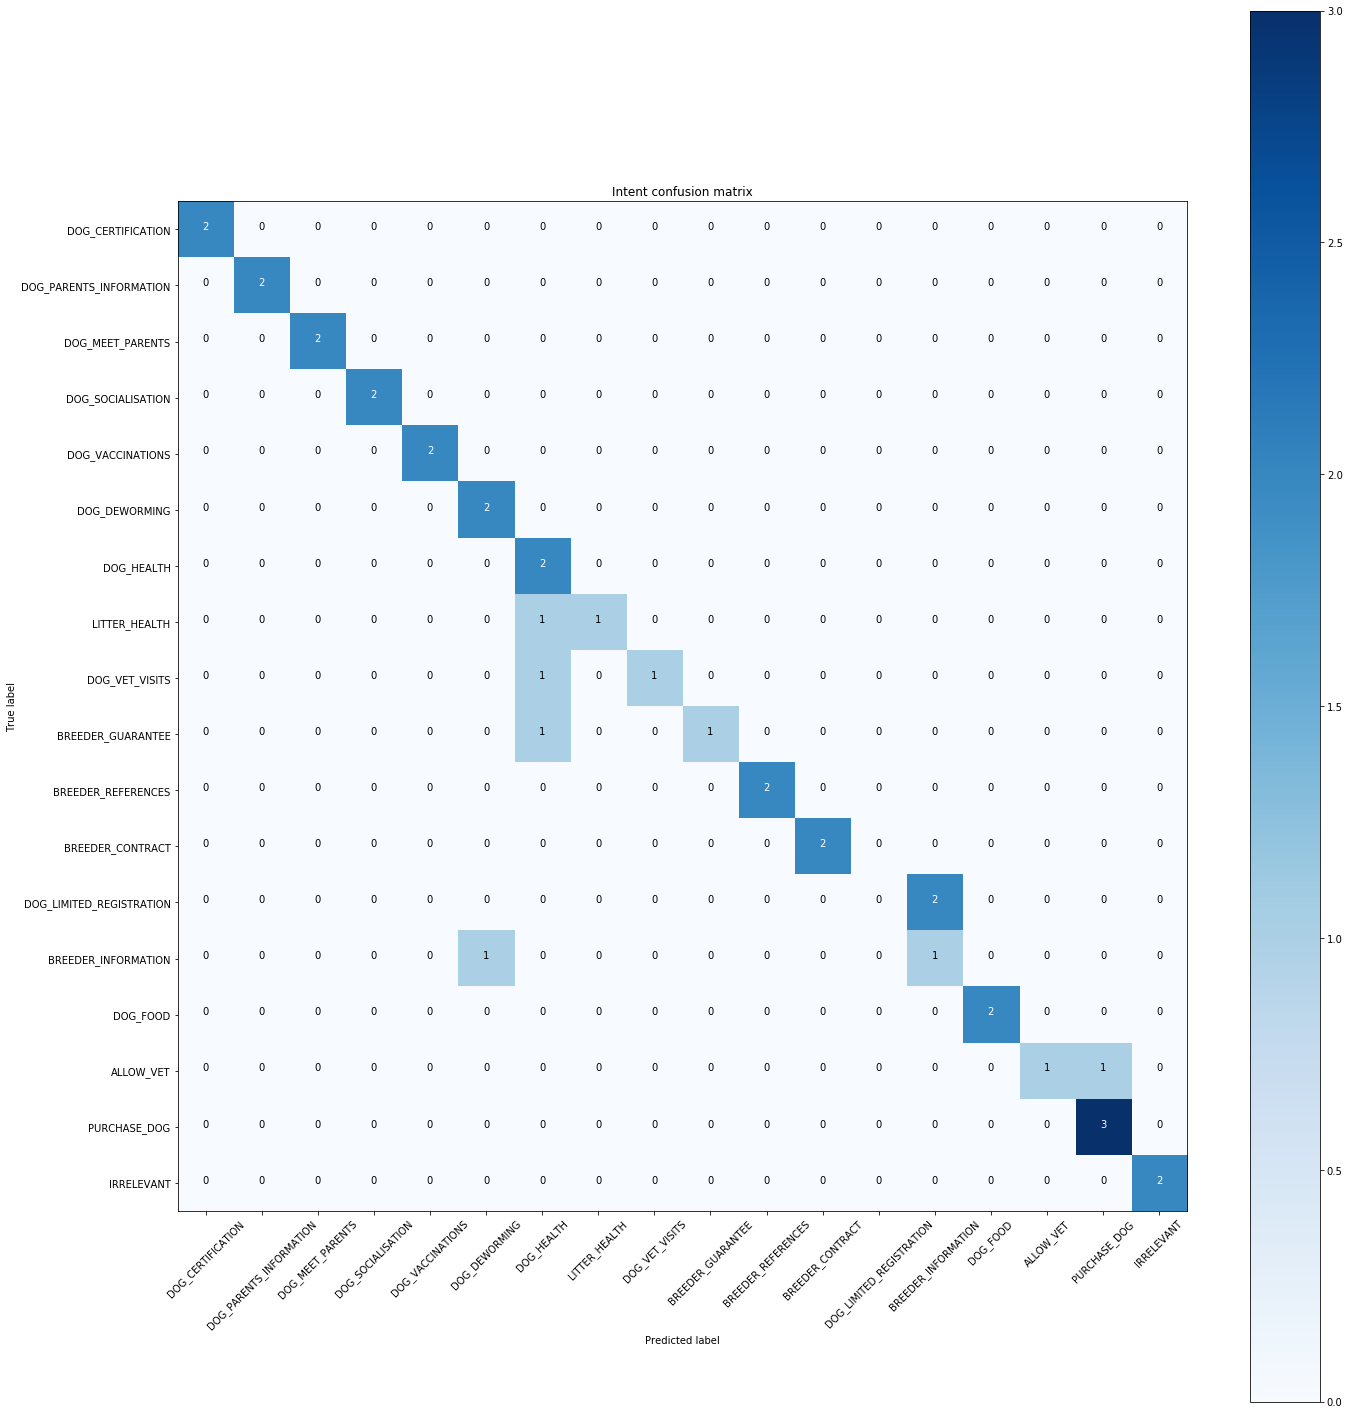

In [248]:
cnf_matrix = confusion_matrix(cm_true, cm_predicted, labels=class_names)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Intent confusion matrix')

plt.show()